In [1]:
import numpy as np
import matplotlib.pyplot as plt

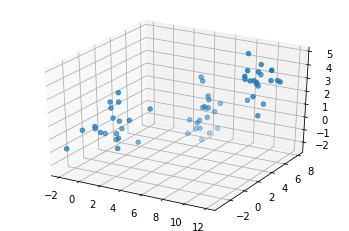

In [2]:
dim = 3

points = [np.random.randn(dim) for _ in range(20)]
points.extend([np.random.randn(dim) + np.array([10,6,3]) for _ in range(20)])
points.extend([np.random.randn(dim) + np.array([5,6,0]) for _ in range(20)])
points = np.array(points)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[: ,2])

plt.show()

In [3]:
def euclidean_distance(a,b):
  return ((a-b) ** 2).sum() ** 0.5


def kmeans(points, k, max_iter=10):
  
  n_points = points.shape[0]

  #랜덤하게 점 선택
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

  for iter in range(max_iter):

    #2 각 점이 어느 중심점에 가장 가까운지
    labels = np.full(n_points, -1)
    for pid, p in enumerate(points):
      min_dist = np.inf
      min_cid = -1
      for cid, c in enumerate(centroids):
        dist = euclidean_distance(p,c)
        if dist < min_dist:
          min_dist = dist
          min_cid = cid
        labels[pid] = min_cid

    new_centroids = np.zeros_like(centroids)
    count = np.zeros(k, dtype=np.int32)

    for  l, p in zip(labels, points):

      new_centroids[l] += p
      #해당 클러스터에 몇 개의 점이 들어가 있는지
      count[l] += 1

    for i in range(k):
      #평균 구하기
      new_centroids[i] /= count[i]

    if np.array_equal(new_centroids, centroids):
      break
    else:
      centroids = new_centroids

  return labels, centroids



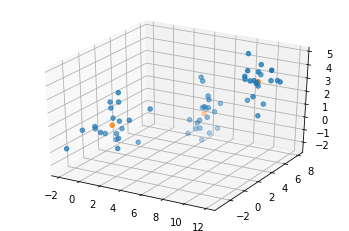

In [15]:
#테스트 1
labels, centroids = kmeans(points, 3)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[: ,2])
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[: ,2])
plt.show()

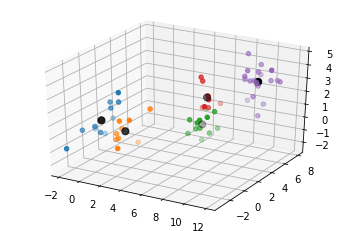

In [25]:
#테스트 2
l, c = kmeans(points, 5)

fig = plt.figure()
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(5)]

for a, p in zip(l, points):
  clusters[a].append(p)

for cluster in clusters:
  ax.scatter(*zip(*cluster))

ax.scatter(*zip(*c), s=50 ,c="black")
plt.show()

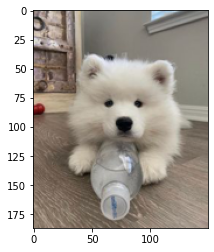

(28050, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


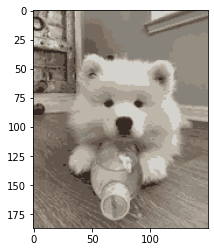

In [70]:
from PIL import Image

#사진 불러오기
im = Image.open("cute_dog.jpg")

width = 150
height = im.height * width // im.width

im = im.resize((width,height))

plt.imshow(im)
plt.show()

pixel = np.array(im).reshape(-1,3).astype(np.float32)
print(pixel.shape)
#pixel.reshape(im.height, im.width, 3)
assignments, centroid = kmeans(pixel,10)

for a,b in zip(range(pixel.shape[0]), assignments):
  pixel[a] = centroid[b]
# img_remastered = Image.fromarray(pixel, 'RGB')
img_remastered = Image.fromarray(pixel.reshape(im.height, im.width, 3).astype(np.int8), 'RGB')
plt.imshow(img_remastered)
plt.show()